In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import matplotlib.pyplot as plt
import os,sys
import glob
import numpy as np
import scipy
from scipy import interpolate

In [60]:
col=["d/e H3", "kin H3","d/e errH3","d/p H3",
     "d/e He3", "kin He3","d/e errHe3","d/p He3",
     "d/e D2", "kin D2","d/e errD2","d/p D2",
     "d/e DM", "kin DM","d/e errDM","d/p DM",
     "d/e EM", "kin EM","d/e errEM","d/p EM",
     "d/e C", "kin C","d/e errC","d/p C"]

DF=pd.read_csv("./images/Deltas.csv",header=None)
DF.columns=col

DF_EM=pd.read_csv("./Deltas_EM.csv",header=None)
DF_EM.columns = ["d/e EM","kin EM","d/e errEM","d/p"]


ValueError: Length mismatch: Expected axis has 19 elements, new values have 24 elements

In [59]:
DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.074997,1,0.000951,1.069990.063609,1,0.001033,1.143730.0649097,1,0.000703,1.066890.260803,1,0.003082,0.01057370.0647364,1,0.000527,0.010458,1,0,0
1,0.066439,2,0.001028,1.10670.0574478,2,0.001021,1.177260.0591444,2,0.000703,1.136950.0802192,2,0.001264,0.01060850.0613454,2,0.000595,0.010770,2,0,0
2,0.061188,3,0.001018,1.182480.0506189,3,0.000935,1.203380.0504796,3,0.000616,1.189970,3,0.000000,00.0609535,3,0.000738,0.011524,3,0,0
3,0.054064,4,0.000972,1.182770.0473525,4,0.000894,1.343890.0449627,4,0.000653,1.193930,4,0.000000,00.0612455,4,0.000821,0.012366,4,0,0
4,0.052913,5,0.000993,1.300290.0440602,5,0.000911,1.432690.0422418,5,0.001116,1.2175819.573,5,NaN,0.005193840.124112,5,0.001769,0.007079,5,0,0
5,0.000000,6,0.000000,00,6,0.000000,00,6,0.000000,00,6,0.000000,00,6,0.000000,0.000000,6,0,0
6,0.049690,7,0.001279,1.573460.0409746,7,0.001095,1.665010.0359507,7,0.001053,1.439180.0894315,7,0.001797,0.01573910.069092,7,0.001773,0.016159,7,0,0
7,0.000000,8,0.000000,00,8,0.000000,00,8,0.000000,00,8,0.000000,00,8,0.000000,0.000000,8,0,0
8,0.049835,9,0.001255,1.657080.0413625,9,0.001142,1.908950.033616,9,0.001056,1.594460,9,0.000000,00.0925778,9,0.001746,0.021707,9,0,0
9,0.000000,10,0.000000,00,10,0.000000,00,10,0.000000,00,10,0.000000,00,10,0.000000,0.000000,10,0,0


KeyError: 'd/e errD2'

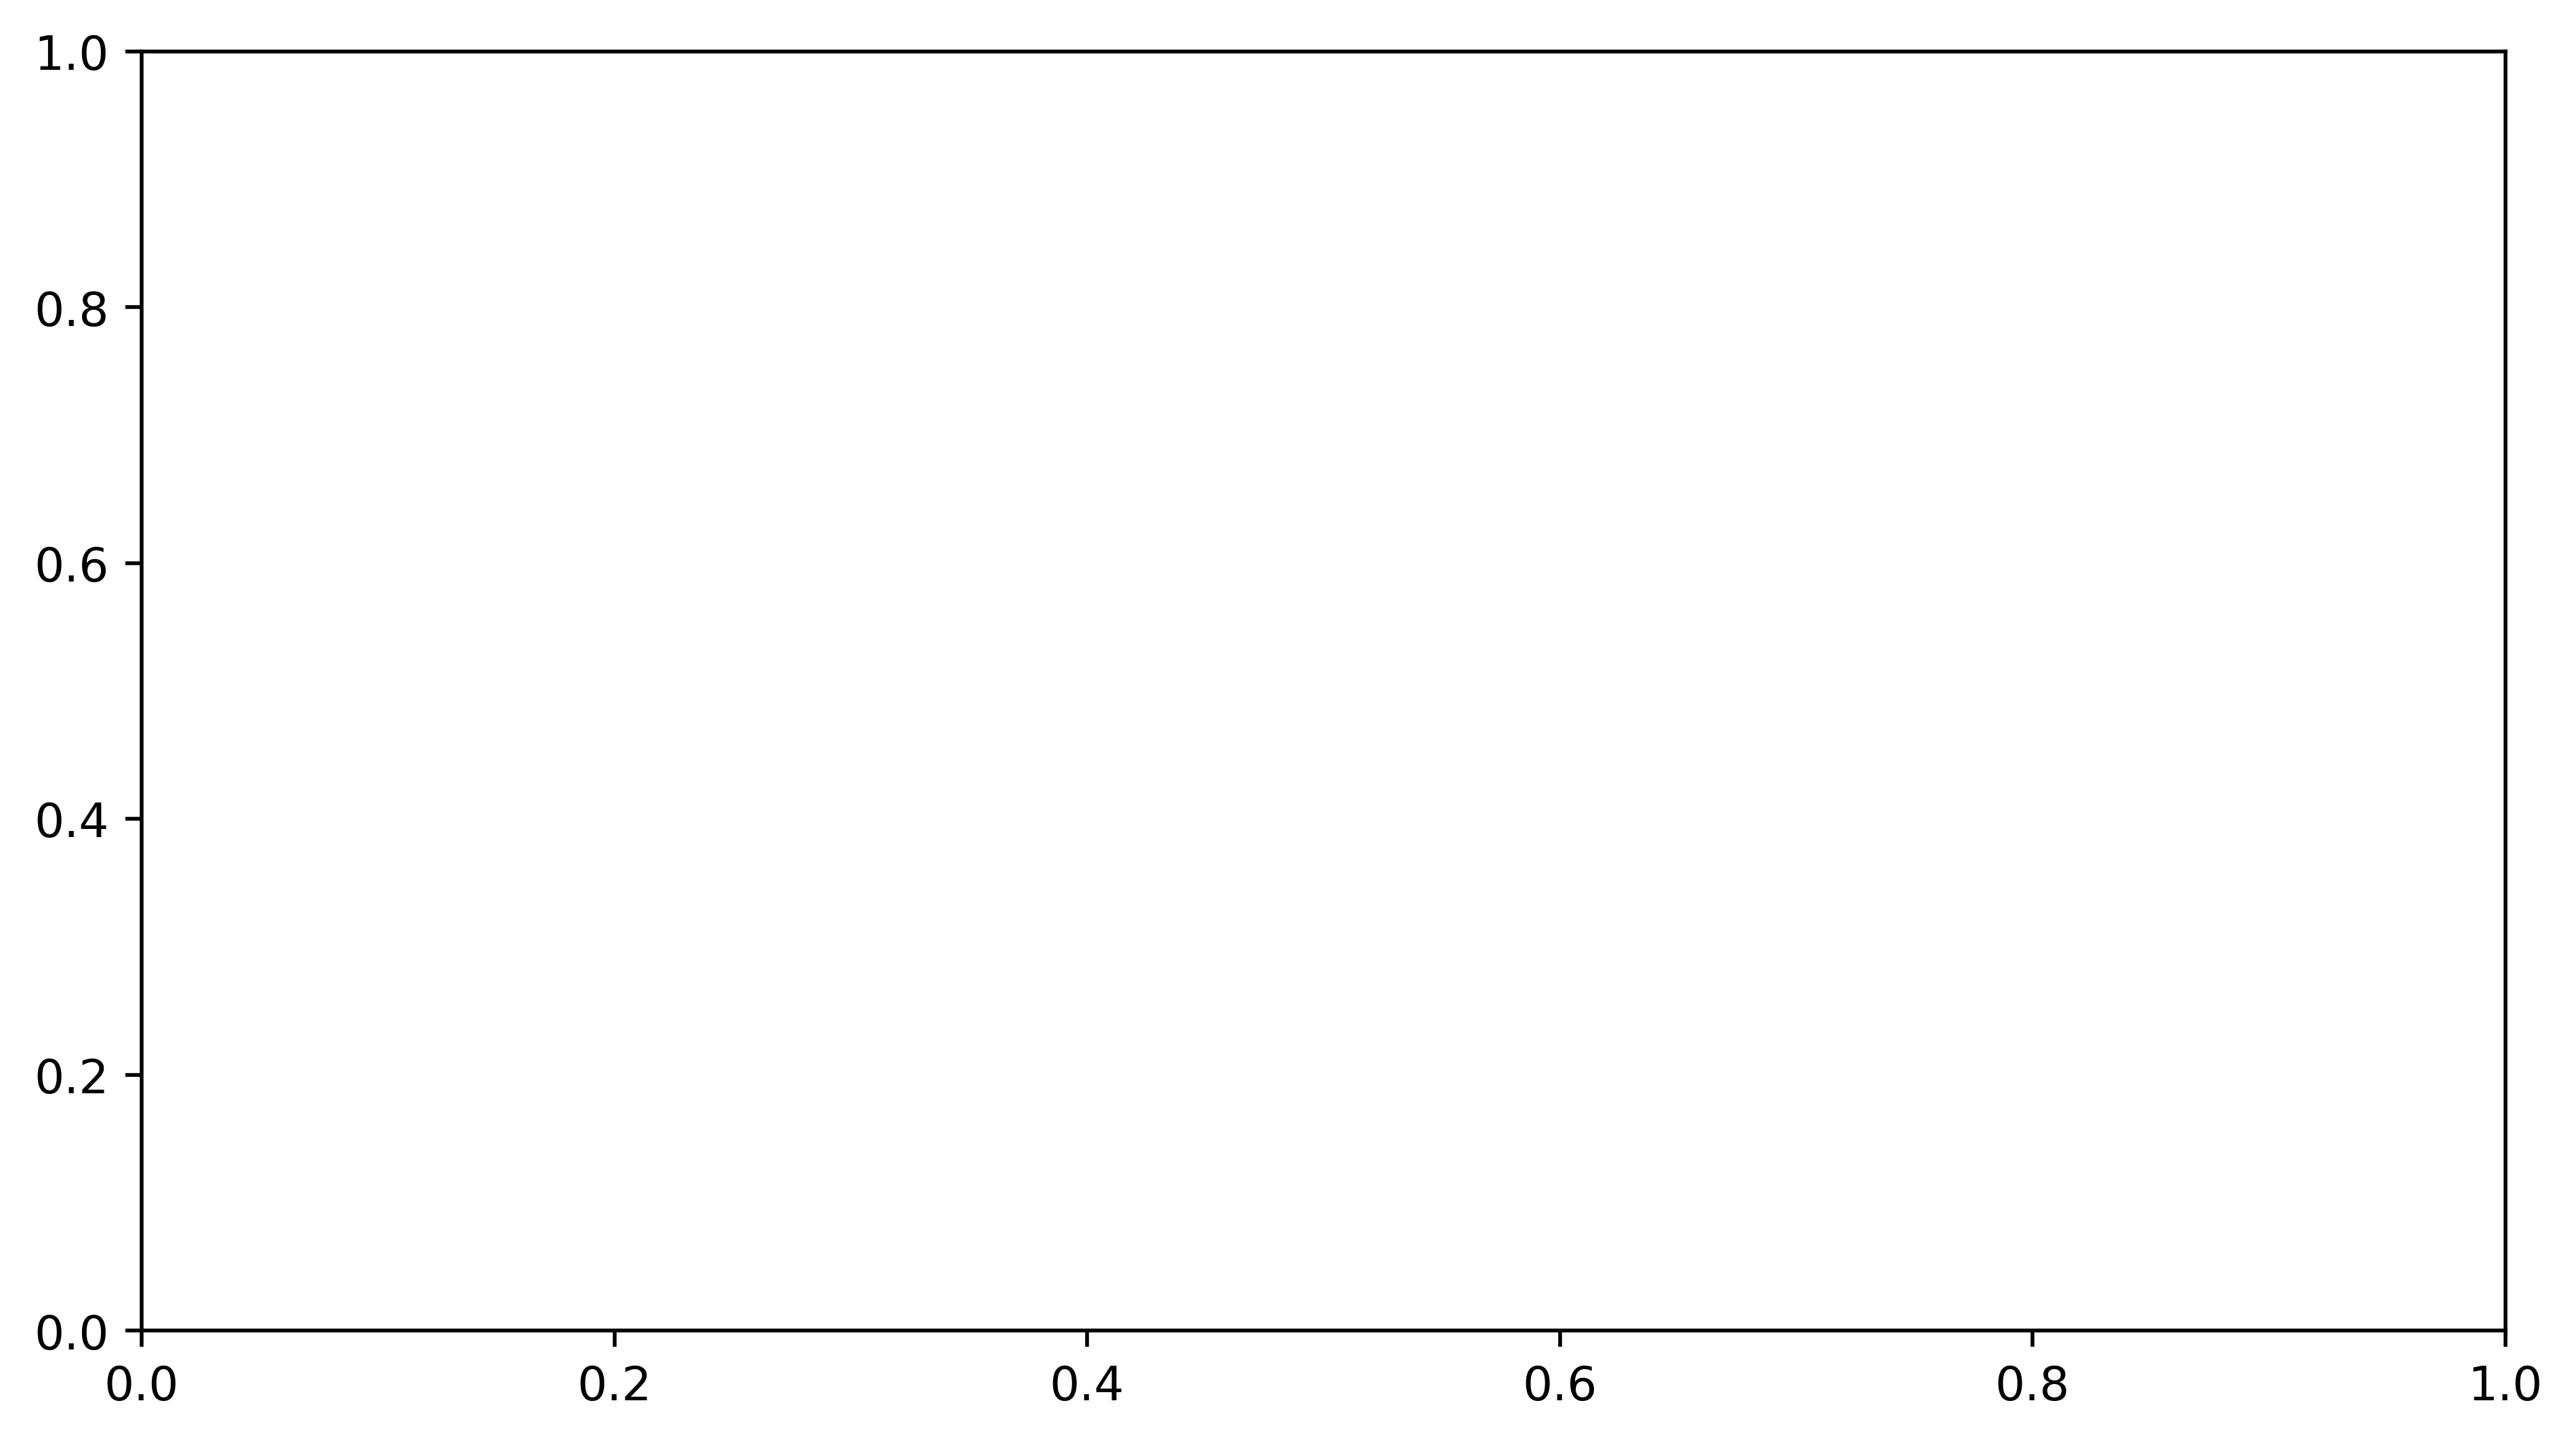

In [58]:
fig= plt.figure(dpi=500,figsize=(9,5))
x=plt.subplot(1,1,1)
DF.plot(ax=x,x='kin D2',y='d/e D2',yerr='d/e errD2',kind='scatter',marker='x',color='b',label='D2 Delta/e')
DF.plot(ax=x,x='kin D2',y='d/e He3',yerr='d/e errHe3',kind='scatter',marker='+',color='r',label='He3 Delta/e')
DF.plot(ax=x,x='kin D2',y='d/e H3',yerr='d/e errH3',kind='scatter',marker='H',color='g',label='H3 Delta/e')
DF_EM.plot(ax=x,x='kin EM',y='d/e EM',yerr='d/e errEM',kind='scatter',marker='d',color='b',label='EM Delta/e')

plt.xlabel("Kinematic")
plt.ylabel("Delta/Electrons")
plt.grid(True)

plt.savefig('./images/DeltaMG.eps',bbox_inches='tight')


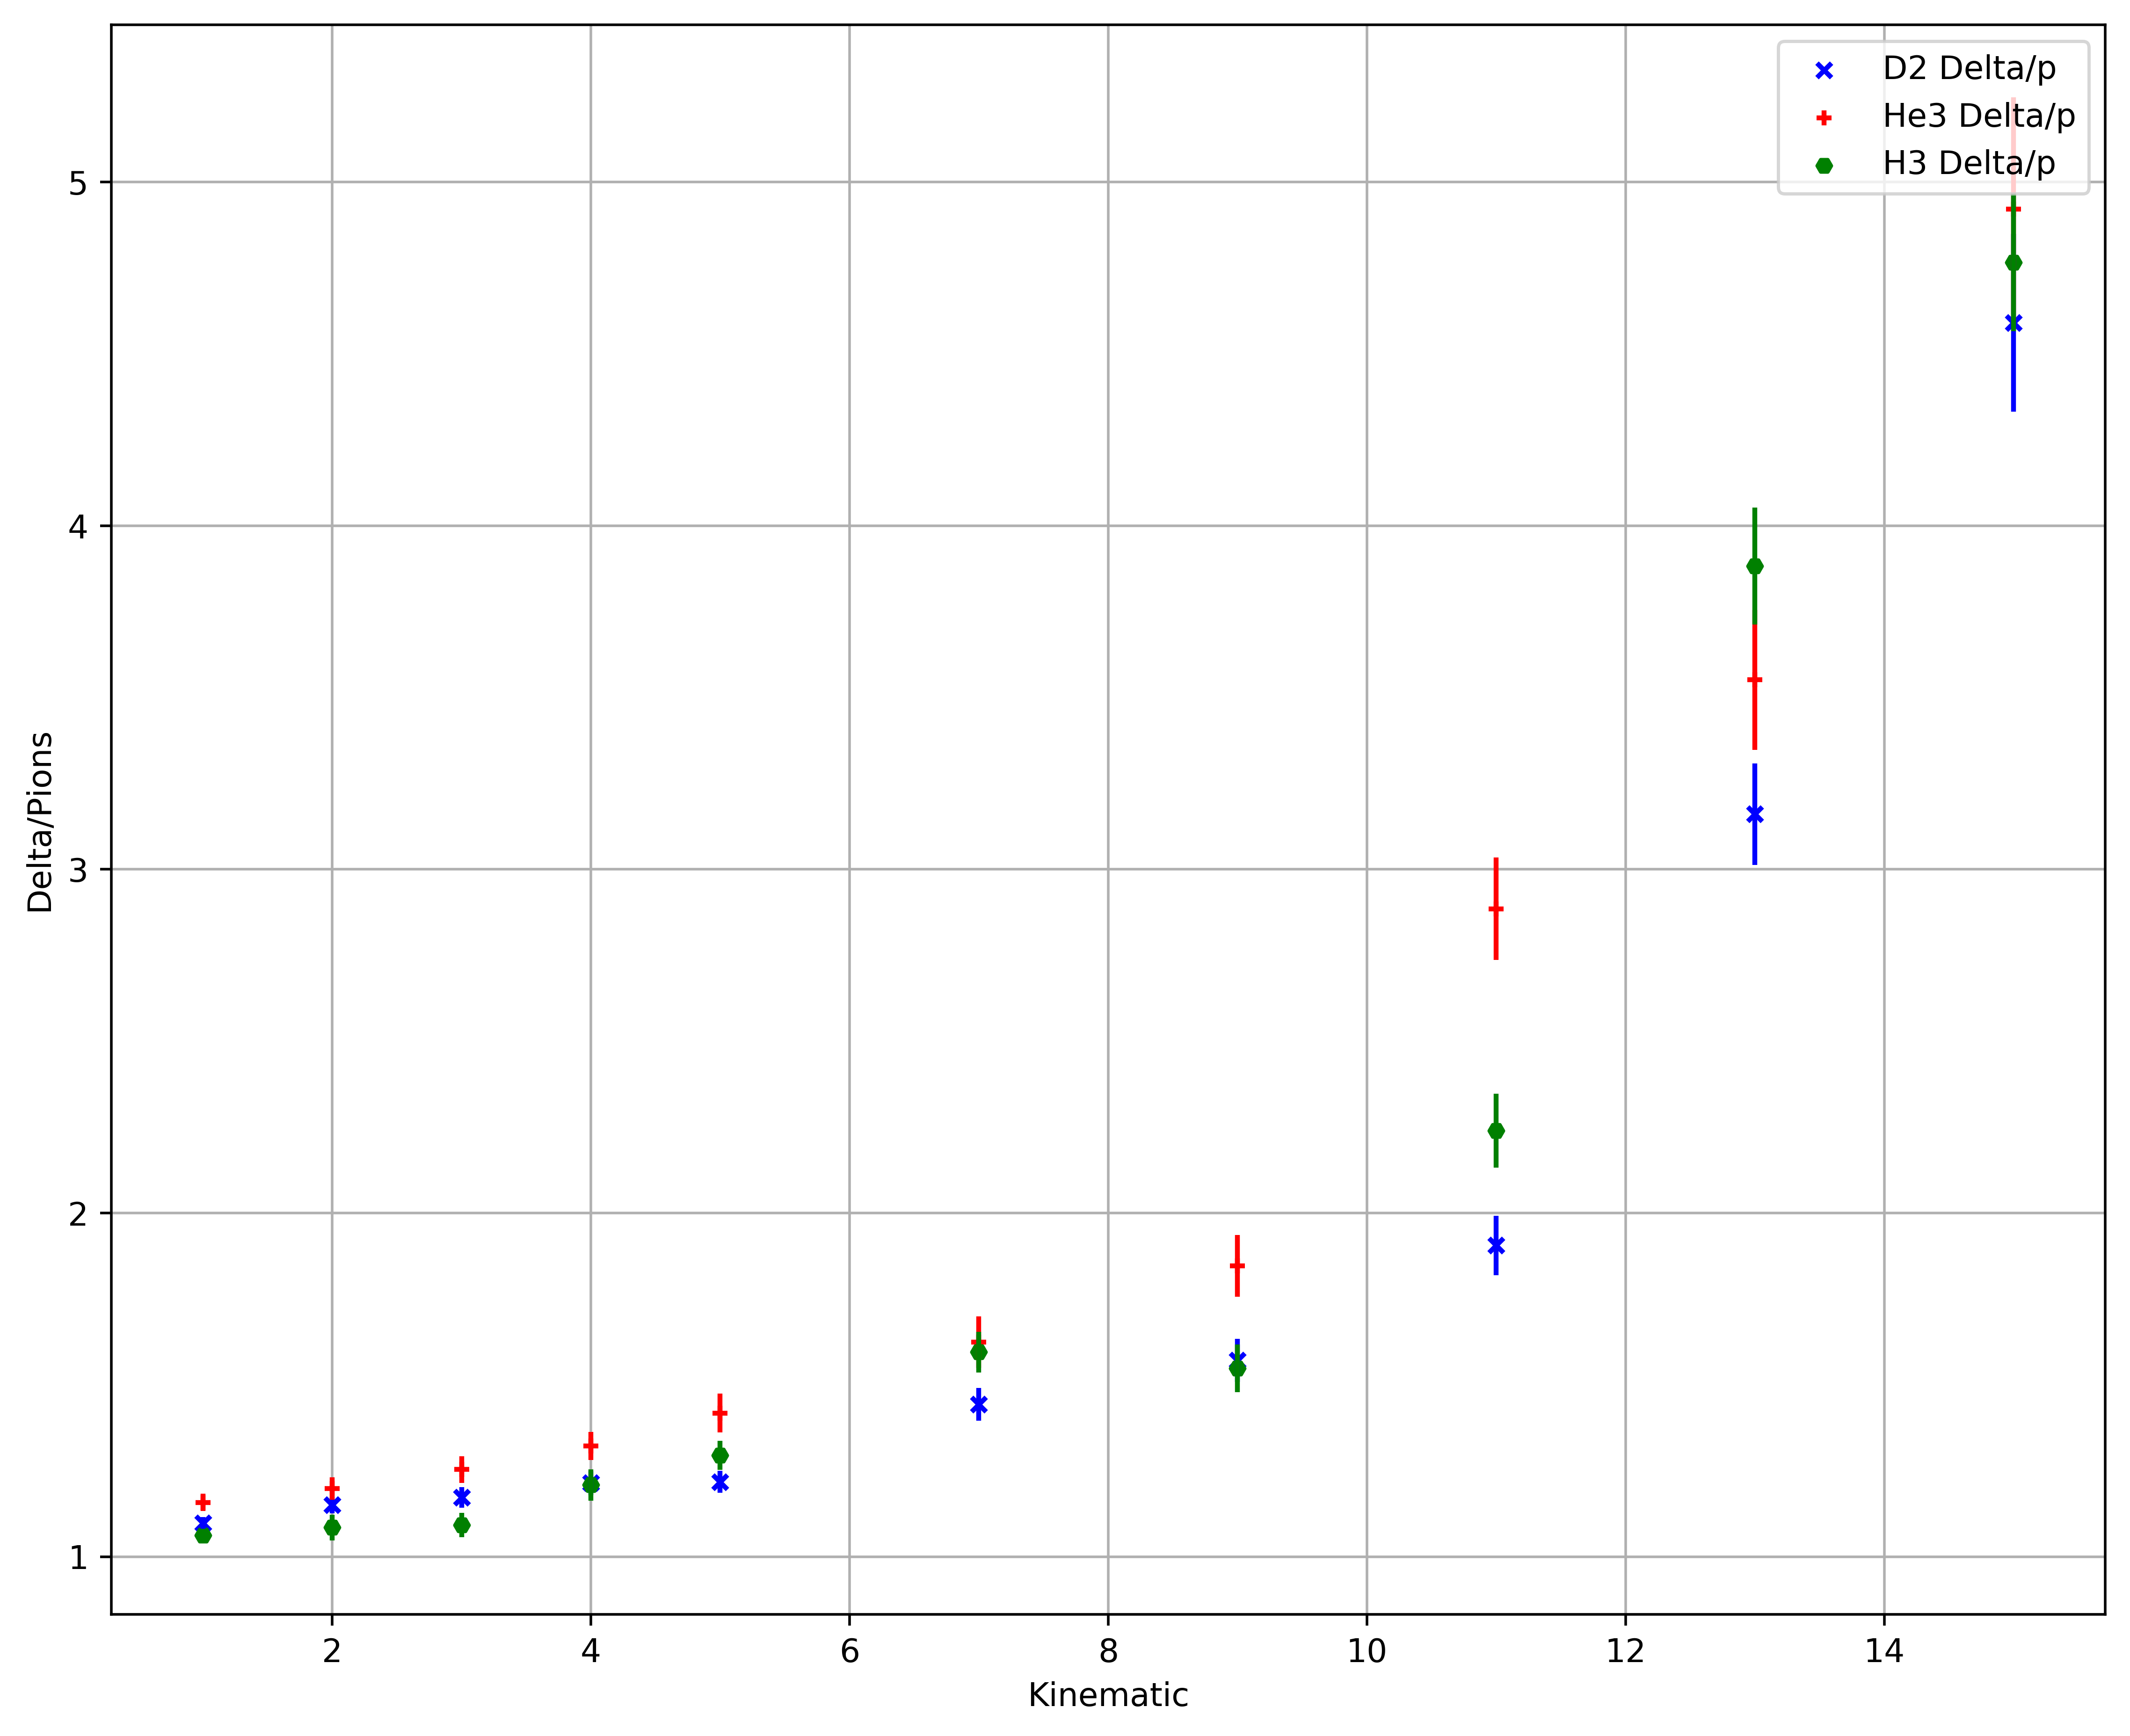

In [44]:
fig1= plt.figure(dpi=500,figsize=(11,9))
x1=plt.subplot(1,1,1)

DF['d/p errD2'] = DF['d/e errD2']/DF['d/e D2']*DF['d/p D2']
DF['d/p errH3'] = DF['d/e errH3']/DF['d/e H3']*DF['d/p H3']
DF['d/p errHe3'] = DF['d/e errHe3']/DF['d/e He3']*DF['d/p He3']

DF.plot(ax=x1,x='kin D2',y='d/p D2',yerr='d/p errD2',kind='scatter',marker='x',color='b',label='D2 Delta/p')
DF.plot(ax=x1,x='kin D2',y='d/p He3',yerr='d/p errHe3',kind='scatter',marker='+',color='r',label='He3 Delta/p')
DF.plot(ax=x1,x='kin D2',y='d/p H3',yerr='d/p errH3',kind='scatter',marker='H',color='g',label='H3 Delta/p')

plt.xlabel("Kinematic")
plt.ylabel("Delta/Pions")
plt.grid(True)

plt.savefig('./images/DeltaMG_dp.eps',bbox_inches='tight')
